# Project 4: Face Recognition Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

from sklearn.decomposition import PCA

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import validation_curve

sns.set()

### We will be primarily be creating a pipeline using PCA and SVM models to build our face recognition model
### We will be using the faces dataset that comes with sklearn

## First Lets Explore The Dataset

In [9]:
## First lets import our dataset

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=50)

In [11]:
## Lets view the faces!

faces.data.shape

(1560, 2914)

In [20]:
## Lets the image shape 
## Notice how a single image is 62x47. When 62 is multiplied by 47 we get 2914 which matches the number of features above 
## So the images have a max of 2941 features and there is a total of 1560 images present in the dataset

faces.images[0].shape

(62, 47)

In [22]:
## Lets view the names of the people in the dataset

faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [26]:
## Lets how many there are in total
## So there are 12 total different people which comprise the 1560 images in the dataset
## We want our program to accuratly pick each person from the dataset
## This is our target or the correct answers to each image that our model will try to accuratly predict

faces.target_names.size

12

In [30]:
## We also have another target column called 'target' which instead of names we have numbers 0-11
## Each number represents a person listed above
## Its just availiable to use inplace of the name

np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [36]:
## We can view which target is associated with each target_name by doing the following
## Starting from 0 and going to 11 we have the names listed in order

faces.target_names[0:11]

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams'], dtype='<U17')

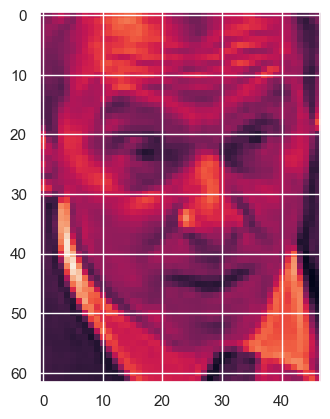

In [38]:
## Now lets draw an image

plt.imshow(faces.images[0])

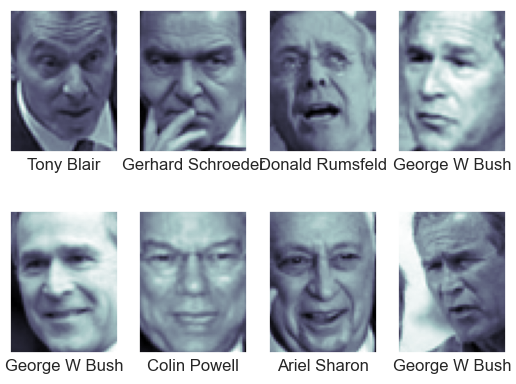

In [42]:
## Lets make it a bit clearerer and show a few more faces

fig,ax = plt.subplots(2,4) ## So we are printing 2 rows of 4

for idx,axidx in enumerate(ax.flat): ## we are rolling through each image with the for loop according to the size of ax which we know is 2x4 or 8
    axidx.imshow(faces.images[idx],cmap='bone') ## We print the image here and changed the color map to bone
    axidx.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[idx]]) ## We then removed the tick marks and added labels under the images

## Now lets create our Models

In [51]:
## Lets import the Support Vector Machine package

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [80]:
## Lets start with PCA model

pcaModel = PCA(n_components=150,whiten=True) ## Whiten is a preprocessing state that standardize the data to standard Gaussian.
svmModel = SVC(kernel='rbf',class_weight='balanced')
mdl = make_pipeline(pcaModel,svmModel)

In [62]:
## Now that our model is ready lets split the data in training and testing data 
## We will be importing a new package called 'train_test-split'

from sklearn.model_selection import train_test_split

In [82]:
## Now lets split the data 
## I split the data into training and testing data where 20% of the dataset will be test data 
## The rest is training data

Xtrain,Xtest,ytrain,ytest = train_test_split(faces.data,faces.target,test_size=0.2)

In [66]:
## Now lets determine the best hyper parameters for our models using a new package in sklearn called GridSearch

from sklearn.model_selection import GridSearchCV

In [92]:
## Now lets find the parameters 
## Basically there are 2 parameters for SVC that have parameters similar to degree in polynomial models 
## There is C which controles regularization and there is Gamma which controles the variant of RBF kernal
## As of right now we dont know what those should be assigned as so that is why we are doing a Grid_search to determine what those values should be
## We are giving 4 different variables for C and gamma below and determining which is best

param_grid = {'svc__C':[1,5,15,30],'svc__gamma':[0.00001,0.00005,0.0001,0.005]}

In [86]:
## Now we create our grid search 
## We give it our model we created above with our pipeline and give it the param_grid we created

grid = GridSearchCV(mdl,param_grid)

In [88]:
## Now grid is defined lets fit the model using the Xtrain and ytrain data

grid.fit(Xtrain,ytrain)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 15, 30],
                         'svc__gamma': [1e-05, 5e-05, 0.0001, 0.005]})

In [90]:
## Great! The model has been fit using the Xtrain and ytrain data!
## Now lets view the best parameters

print(grid.best_params_)

{'svc__C': 15, 'svc__gamma': 0.005}


In [94]:
## Thanks to GridSearchCV we can also view the best estimator or best version of the model!
## Lets assign our model to the best estimator

mdl = grid.best_estimator_

In [96]:
## Now that we have the best version of our model lets creat our y_pred from the test set

y_pred = mdl.predict(Xtest)

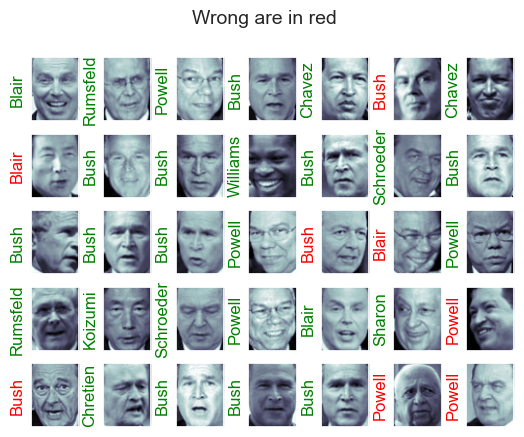

In [109]:
## Now that we have our y_pred lets compare that to our correct ytest

fig,ax = plt.subplots(5,7)
for idx , axidx in enumerate(ax.flat):
    axidx.imshow(Xtest[idx].reshape(62,47),cmap='bone')
    axidx.set(xticks=[],yticks=[])
    axidx.set_ylabel(faces.target_names[y_pred[idx]].split()[-1],color='green' if y_pred[idx]==ytest[idx] else 'red')
    fig.suptitle('Wrong are in red',size=14)

### GREAT! We can see that we have created a face recognition model!

## Now lets evaluate our model using classification reports from sklearn to see how accurate we are

In [115]:
## Importing our new package

from sklearn.metrics import classification_report

## Lets define some of the metrics given by the classification report:

### Precision - Precision is one indicator of a machine learning model's performance – the quality of a positive prediction made by the model. Precision refers to the number of true positives divided by the total number of positive predictions (i.e., the number of true positives plus the number of false positives).

### Recall - Recall is a metric that measures how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset. You can calculate recall by dividing the number of true positives by the number of positive instances.

### f1-score - F1 score is a measure of the harmonic mean of precision and recall. Commonly used as an evaluation metric in binary and multi-class classification and LLM evaluation, the F1 score integrates precision and recall into a single metric to gain a better understanding of model performance. F-score can be modified into F0.

### Support - Support refers to the number of actual occurrences of the class in the dataset. It is the number of instances in each class.

### Accuracy - Accuracy is a metric that measures how often a machine learning model correctly predicts the outcome. You can calculate accuracy by dividing the number of correct predictions by the total number of predictions.

### macro avg - Macro-averaging calculates each class's performance metric (e.g., precision, recall) and then takes the arithmetic mean across all classes. So, the macro-average gives equal weight to each class, regardless of the number of instances.

### weighted avg - The weighted average accounts for the relative importance or frequency of some factors in a data set. In a weighted average, each data point value is multiplied by the assigned weight, which is then summed and divided by the total number of data points.

In [119]:
print(classification_report(ytest,y_pred,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.79      0.75      0.77        20
     Colin Powell       0.77      0.86      0.81        50
  Donald Rumsfeld       0.83      0.56      0.67        27
    George W Bush       0.80      0.99      0.88       119
Gerhard Schroeder       0.86      0.57      0.69        21
      Hugo Chavez       1.00      0.70      0.82        10
   Jacques Chirac       0.75      0.27      0.40        11
    Jean Chretien       1.00      0.64      0.78        11
    John Ashcroft       1.00      0.50      0.67         8
Junichiro Koizumi       1.00      0.62      0.77         8
  Serena Williams       1.00      0.50      0.67         6
       Tony Blair       0.70      0.90      0.79        21

         accuracy                           0.80       312
        macro avg       0.87      0.66      0.73       312
     weighted avg       0.82      0.80      0.79       312



In [127]:
## We have the above chat to look at but lets turn it into a confusion matrix and heatmap to view easier. 
## But first lets import a new package

from sklearn.metrics import confusion_matrix

In [129]:
## We will build our confusion matrix here 

mat = confusion_matrix(ytest,y_pred)

Text(110.44999999999996, 0.5, 'predicted label')

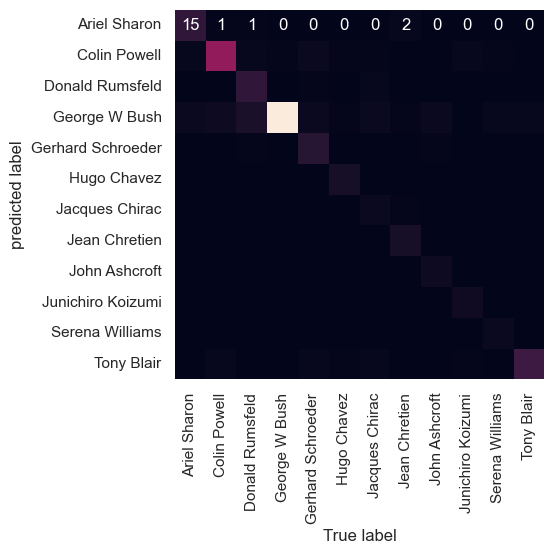

In [157]:
## Now lets build our heatmap using seaborn
## This is basically show us how frequently each person is mistaken for others 
figsize=(20, 20)

sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel("True label")
plt.ylabel("predicted label")